<a href="https://colab.research.google.com/github/sidshenoy08/LSTM-Stock-Prediction/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/sample_data/HistoricalQuotes.csv")

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
def preprocess(price):
  return float(price[2:])

In [5]:
df.columns = ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [6]:
print(df.columns)

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [7]:
df['Close/Last'] = df['Close/Last'].apply(preprocess)

In [8]:
print(df['Close/Last'].iloc[0])

273.36


In [9]:
df['Open'] = df['Open'].apply(preprocess)
df['High'] = df['High'].apply(preprocess)
df['Low'] = df['Low'].apply(preprocess)

In [10]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [11]:
print(type(df.iloc[1, 0]))

<class 'str'>


In [12]:
from datetime import datetime

In [13]:
def preprocess_date(date):
  date_obj = datetime.strptime(date, '%m/%d/%Y')
  return date_obj.date()

In [14]:
df['Date'] = df['Date'].apply(preprocess_date)

In [15]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-02-28,273.36,106721200,257.26,278.41,256.37
1,2020-02-27,273.52,80151380,281.10,286.00,272.96
2,2020-02-26,292.65,49678430,286.53,297.88,286.50
3,2020-02-25,288.08,57668360,300.95,302.53,286.13
4,2020-02-24,298.18,55548830,297.26,304.18,289.23


In [16]:
df.set_index('Date')

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700
2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600
2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057


In [17]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [18]:
import matplotlib.pyplot as plt

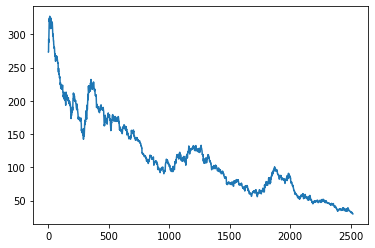

In [19]:
plt.plot(df['Close/Last'])

In [20]:
df.sort_values(by='Date', ascending=True, inplace=True)

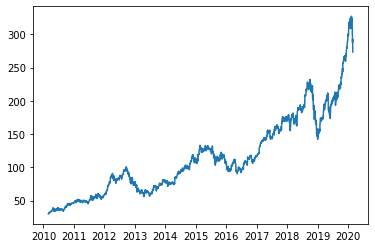

In [21]:
plt.plot(df['Date'], df['Close/Last'])

In [22]:
df.set_index('Date', inplace=True)

In [23]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614


In [24]:
# train_set = df['Open'].values
train_set = df['Open'][0:2000].values

In [25]:
print(train_set[0])
print(train_set.shape)

29.3928
(2000,)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
train_set = np.reshape(train_set, (train_set.shape[0], 1))

In [28]:
train_set

array([[ 29.3928],
       [ 29.99  ],
       [ 29.8486],
       ...,
       [166.    ],
       [159.1   ],
       [154.83  ]])

In [29]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

In [30]:
training_set_scaled.shape

(2000, 1)

In [31]:
X_train = []
y_train = []

In [32]:
for i in range(200, 1999):
  X_train.append(training_set_scaled[i-200:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [33]:
y_train[0]

0.11298917435450187

In [34]:
print(type(X_train))

<class 'list'>


In [35]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [36]:
X_train.shape

(1799, 200)

In [37]:
y_train.shape

(1799,)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [39]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [40]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [41]:
earlyStop = EarlyStopping(monitor='loss', patience=10)

In [42]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=1, callbacks=[earlyStop])

Epoch 1/50
57/57 [==============================] - 31s 401ms/step - loss: 0.0228
Epoch 2/50
57/57 [==============================] - 23s 401ms/step - loss: 0.0041
Epoch 3/50
57/57 [==============================] - 23s 398ms/step - loss: 0.0037
Epoch 4/50
57/57 [==============================] - 24s 425ms/step - loss: 0.0037
Epoch 5/50
57/57 [==============================] - 23s 406ms/step - loss: 0.0035
Epoch 6/50
57/57 [==============================] - 23s 400ms/step - loss: 0.0030
Epoch 7/50
57/57 [==============================] - 23s 401ms/step - loss: 0.0031
Epoch 8/50
57/57 [==============================] - 23s 404ms/step - loss: 0.0031
Epoch 9/50
57/57 [==============================] - 23s 402ms/step - loss: 0.0025
Epoch 10/50
57/57 [==============================] - 23s 399ms/step - loss: 0.0025
Epoch 11/50
57/57 [==============================] - 23s 400ms/step - loss: 0.0025
Epoch 12/50
57/57 [==============================] - 23s 401ms/step - loss: 0.0023
Epoch 13/50
5

In [43]:
test_set = df['Open'][1800:].values

In [44]:
print(test_set[0])
print(test_set.shape)

143.5
(718,)


In [45]:
test_set = test_set.reshape(-1, 1)

In [46]:
test_set[0]

array([143.5])

In [47]:
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)

In [48]:
test_set_scaled.shape

(718, 1)

In [49]:
X_test = []
y_test = []

In [50]:
for i in range(200, 718):
  X_test.append(test_set_scaled[i-200:i, 0])

In [51]:
X_test = np.array(X_test)

In [52]:
X_test.shape

(518, 200)

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [54]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [55]:
print(predicted_stock_price[100:105])

[[185.4926 ]
 [185.37143]
 [185.5055 ]
 [185.81537]
 [186.19504]]


In [56]:
print(predicted_stock_price.shape)

(518, 1)


In [57]:
real_stock_price = df['Open'][2000:].values

In [58]:
print(real_stock_price[100:105])

[183.82 187.79 185.26 185.42 189.5 ]


In [59]:
real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0], 1))

In [60]:
print(predicted_stock_price.shape)
print(real_stock_price.shape)

(518, 1)
(518, 1)


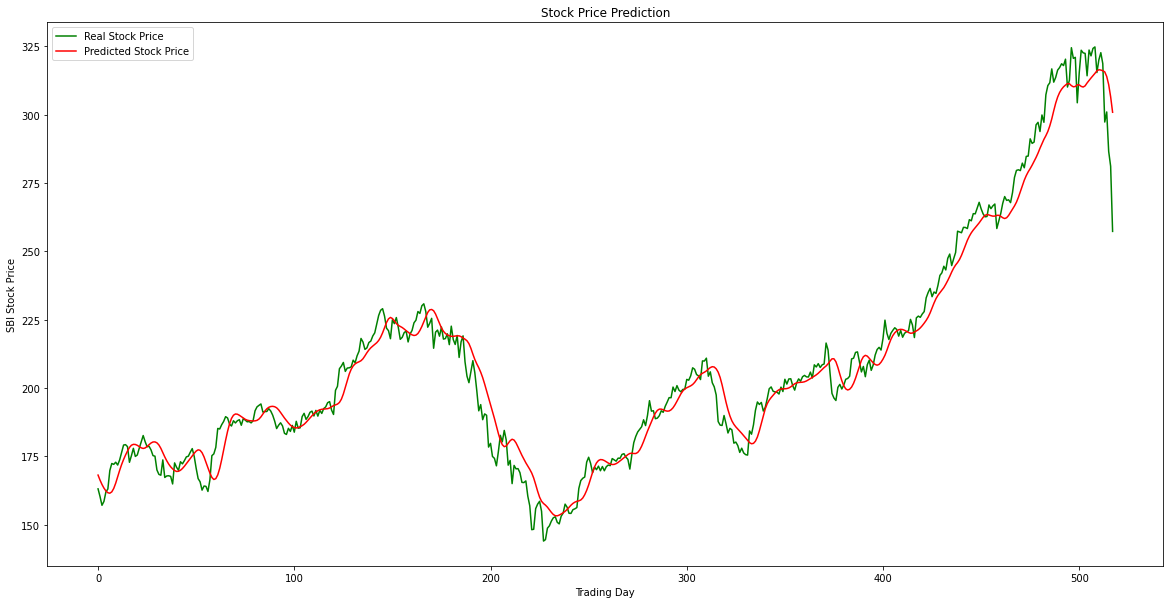

In [61]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
print("MAE: ", mean_absolute_error(real_stock_price, predicted_stock_price))
print("MSE: ", mean_squared_error(real_stock_price, predicted_stock_price))
print("RMSE: ", np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))

MAE:  5.33761042254238
MSE:  49.829454622571866
RMSE:  7.0589981316453025
